In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
# Read survey results file
survey_df=pd.read_csv('survey-results-public.csv',low_memory=False)
#read the schema
schema_df=pd.read_csv('survey-results-schema.csv')


## Data Understanding

In [3]:
# View data
survey_df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# view number of records
survey_df.shape[0]

51392

In [5]:
# List the survey columns
list(survey_df.columns)

['Respondent',
 'Professional',
 'ProgramHobby',
 'Country',
 'University',
 'EmploymentStatus',
 'FormalEducation',
 'MajorUndergrad',
 'HomeRemote',
 'CompanySize',
 'CompanyType',
 'YearsProgram',
 'YearsCodedJob',
 'YearsCodedJobPast',
 'DeveloperType',
 'WebDeveloperType',
 'MobileDeveloperType',
 'NonDeveloperType',
 'CareerSatisfaction',
 'JobSatisfaction',
 'ExCoderReturn',
 'ExCoderNotForMe',
 'ExCoderBalance',
 'ExCoder10Years',
 'ExCoderBelonged',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExCoderActive',
 'PronounceGIF',
 'ProblemSolving',
 'BuildingThings',
 'LearningNewTech',
 'BoringDetails',
 'JobSecurity',
 'DiversityImportant',
 'AnnoyingUI',
 'FriendsDevelopers',
 'RightWrongWay',
 'UnderstandComputers',
 'SeriousWork',
 'InvestTimeTools',
 'WorkPayCare',
 'KinshipDevelopers',
 'ChallengeMyself',
 'CompetePeers',
 'ChangeWorld',
 'JobSeekingStatus',
 'HoursPerWeek',
 'LastNewJob',
 'AssessJobIndustry',
 'AssessJobRole',
 'AssessJobExp',
 'AssessJobDept',
 'AssessJobT

In [6]:
# View the schema df
schema_df

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."
...,...,...
149,QuestionsInteresting,The questions were interesting
150,QuestionsConfusing,The questions were confusing
151,InterestedAnswers,I'm interested in learning how other developer...
152,Salary,"What is your current annual base salary, befor..."


In [7]:
# Deterine max Question length
schema_df.Question.map(lambda x: len(x)).max()

1065

## Explore the data to find interesting questions

In [8]:
# Create a function to look at survey questions by column
def srvy_question(col):
    '''Takes in column name and returns the question that corresponds to the columns values'''
    #set max column width
    pd.options.display.max_colwidth = 1065
    # print question for Column
    print(schema_df[schema_df['Column'] == col].Question)


#### I am going to interate through survey questions and answers until I find three interesting questions.

In [9]:
# view question
srvy_question('JobSecurity')

33    Job security is important to me
Name: Question, dtype: object


In [10]:
# View responses
survey_df['JobSecurity'].value_counts()

Agree                13035
Somewhat agree        7862
Strongly agree        7347
Disagree              2408
Strongly disagree      588
Name: JobSecurity, dtype: int64

### Does the importance of job security vary by gender?

In [11]:
# view question
srvy_question('Professional')

1    Which of the following best describes you?
Name: Question, dtype: object


In [12]:
# View responses
survey_df['Professional'].value_counts()

Professional developer                                  36131
Student                                                  8224
Professional non-developer who sometimes writes code     5140
Used to be a professional developer                       983
None of these                                             914
Name: Professional, dtype: int64

### What are the most common languages for non-developer types and how does that compare to languages used by professional developers?

In [13]:
# View question
srvy_question('HomeRemote')

8    How often do you work from home or remotely?
Name: Question, dtype: object


In [14]:
# view responses
survey_df['HomeRemote'].value_counts()

A few days each month                                      15454
Never                                                      13975
All or almost all the time (I'm full-time remote)           4905
Less than half the time, but at least one day each week     4147
More than half, but not all, the time                       1909
It's complicated                                            1849
About half the time                                         1769
Name: HomeRemote, dtype: int64

### Is there a relationship between job satisfaction and working from home?  Does this vary by gender?

In [15]:
# view question
srvy_question('ImportantBenefits')

64    When it comes to compensation and benefits, other than base salary, which of the following are most important to you?
Name: Question, dtype: object


In [16]:
# view responses
survey_df['ImportantBenefits'].value_counts()

None of these                                                                                                    653
Retirement; Vacation/days off; Health benefits; Expected work hours; Remote options                              363
Vacation/days off; Equipment; Professional development sponsorship; Expected work hours; Remote options          324
Vacation/days off; Health benefits; Equipment; Expected work hours; Remote options                               305
Vacation/days off; Health benefits; Professional development sponsorship; Expected work hours; Remote options    249
                                                                                                                ... 
Equipment; Education sponsorship; Remote options; Other                                                            1
Annual bonus; Education sponsorship; Expected work hours; Meals                                                    1
Professional development sponsorship; Child/elder care          

### What are the most important benefits and do they vary by gender?

## Prepare Data

In [17]:
# Create a index of not null values
# create a not null index for JobSecurity columnn so that we can exclude records where JobSecurity 
#  was not provided
not_null=pd.notnull(survey_df["JobSecurity"])

# create male job security dataset
MaleJobSecurity=survey_df[not_null].query('Gender == "Male"')[['Gender','JobSecurity']]
# add a Count column to use for aggregate
MaleJobSecurity['Count']=1
# get count of males
male_count=MaleJobSecurity.shape[0]
MaleJobSecurity=MaleJobSecurity.groupby(['JobSecurity', 'Gender']).agg({'Count': 'sum'})
MaleJobSecurity['Percent']=(100*MaleJobSecurity.Count)/male_count

#Create job security dataset with females and then append males to it
JobSecurity=survey_df[not_null].query('Gender == "Female"')[['Gender','JobSecurity']]
JobSecurity['Count']=1
female_count=JobSecurity.shape[0]
JobSecurity=JobSecurity.groupby(['JobSecurity', 'Gender']).agg({'Count': 'sum'})
JobSecurity['Percent']=(100*JobSecurity.Count)/female_count
#Append male dataset
JobSecurity=JobSecurity.append(MaleJobSecurity)
#Reset index so that we can graph it later
JobSecurity=JobSecurity.reset_index()

In [18]:
JobSecurity

,JobSecurity,Gender,Count,Percent
0,Agree,Female,855,43.667007
1,Disagree,Female,88,4.494382
2,Somewhat agree,Female,396,20.224719
3,Strongly agree,Female,602,30.745659
4,Strongly disagree,Female,17,0.868233
5,Agree,Male,9740,42.071617
6,Disagree,Male,1888,8.155155
7,Somewhat agree,Male,5981,25.834737
8,Strongly agree,Male,5118,22.107036
9,Strongly disagree,Male,424,1.831454


In [19]:
# See what language data looks like
survey_df.HaveWorkedLanguage.value_counts()

C#; JavaScript; SQL                                     1276
JavaScript; PHP; SQL                                    1143
Java                                                     913
JavaScript                                               807
JavaScript; PHP                                          662
                                                        ... 
C; C++; Java; JavaScript; Lua; PHP; Ruby; SQL              1
CoffeeScript; Haskell; Java; JavaScript; Objective-C       1
C; Java; JavaScript; PHP; Python; Ruby; Scala; SQL         1
C; C++; C#; JavaScript; SQL; TypeScript; VB.NET            1
Assembly; C; C++; Erlang; Java; JavaScript; PHP; SQL       1
Name: HaveWorkedLanguage, Length: 8438, dtype: int64

#### HaveWorkedLanguage column contains a list of values that will need to be flattened.  Once flattened, we can get counts by HaveWorkedLanguage

In [20]:
# create function to flatten list of lists
def flat_map(x):
    '''Takes a column value x containing a list of values and flattens it into a column of single values'''
    flat_list = []
    for sublist in x:
        for item in sublist:
            flat_list.append(item)
    return(flat_list)


In [21]:
# Create df of languages for professional developers
prof_lang_df=pd.DataFrame(flat_map(survey_df[pd.notnull(survey_df['HaveWorkedLanguage'])].query\
                                  ('Professional in ("Professional developer", "Used to be a professional \
                                  developer")')['HaveWorkedLanguage'].str.split(';')), columns=['Language'])


In [22]:
# Create df of languages for non-professional developers
non_prof_lang_df=pd.DataFrame(flat_map(survey_df[pd.notnull(survey_df['HaveWorkedLanguage'])].query\
                                  ('Professional not in ("Professional developer", "Used to be a professional \
                                  developer")')['HaveWorkedLanguage'].str.split(';')), columns=['Language'])


In [23]:
# Get mean satisfaction for each Gender grouped by HomeRemote
male_satisfaction=survey_df.query('Gender == "Male"').groupby('HomeRemote').agg\
    ({'CareerSatisfaction':'mean'}).sort_values(['CareerSatisfaction'], ascending=False)
# Add Gender attribute
male_satisfaction['Gender']="Male"
# Add a mean ratio score so that we can compare men and women
male_satisfaction['mean_ratio']=male_satisfaction['CareerSatisfaction']/male_satisfaction.CareerSatisfaction.mean()

#Create Female dataset
female_satisfaction=survey_df.query('Gender == "Female"').groupby('HomeRemote').agg\
    ({'CareerSatisfaction':'mean'}).sort_values(['CareerSatisfaction'], ascending=False)
# Add Gender attribute
female_satisfaction['Gender']="Female"
# Add a mean ratio score so that we can compare men and women
female_satisfaction['mean_ratio']=female_satisfaction['CareerSatisfaction']/female_satisfaction.CareerSatisfaction.mean()
#Create combined career satisfaction dataset
Career_Satisfaction=male_satisfaction.append(female_satisfaction).reset_index()
# Validate
Career_Satisfaction

,HomeRemote,CareerSatisfaction,Gender,mean_ratio
0,All or almost all the time (I'm full-time remote),7.748168,Male,1.032192
1,"Less than half the time, but at least one day each week",7.677432,Male,1.022769
2,About half the time,7.614689,Male,1.014411
3,A few days each month,7.537368,Male,1.004110
4,"More than half, but not all, the time",7.491018,Male,0.997935
5,It's complicated,7.311934,Male,0.974078
6,Never,7.165002,Male,0.954504
7,"Less than half the time, but at least one day each week",7.661765,Female,1.053544
8,It's complicated,7.522727,Female,1.034425
9,A few days each month,7.357583,Female,1.011717


In [24]:
# View counts by gender
survey_df.query('Gender in ("Male","Female")').Gender.value_counts()

Male      31589
Female     2600
Name: Gender, dtype: int64

In [25]:
# create df with important benefits selected by Men
male_imp_df=pd.DataFrame(flat_map(survey_df[pd.notnull(survey_df['ImportantBenefits'])].query\
                            ('Gender == "Male"')['ImportantBenefits'].str.split(';')), columns=['Benefits'])


In [26]:
# create df with important benefits selected by women
female_imp_df=pd.DataFrame(flat_map(survey_df[pd.notnull(survey_df['ImportantBenefits'])].query\
                            ('Gender == "Female"')['ImportantBenefits'].str.split(';')), columns=['Benefits'])


## Evaluate the Results

In [27]:
### Does the importance of job security vary by gender?

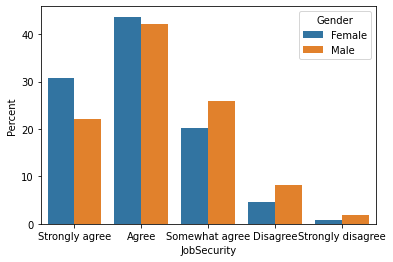

In [28]:
# Plot JobSecurity
ax = sb.barplot(x="JobSecurity", y="Percent", hue="Gender", data=JobSecurity, order=["Strongly agree","Agree","Somewhat agree","Disagree","Strongly disagree"])

* Job Security is a little more important to females than men, but the difference is not very large.

#### What are the most common languages for non-developer types and how does that compare to languages used by professional developers?

In [29]:
# View top5 programming languages
prof_lang_df.Language.str.lstrip().value_counts().head(5)


JavaScript    18421
SQL           14836
Java          10586
C#            10129
Python         7613
Name: Language, dtype: int64

In [30]:
# View top5 programming languages
non_prof_lang_df.Language.str.lstrip().value_counts().head(5)

JavaScript    4454
Python        4091
Java          3938
SQL           3918
C++           2829
Name: Language, dtype: int64

* Javascript is most commonly used among professional and non-professional developers.  SQL is number two among professional developers, but number four for non-professional developers.

#### Is there a relationship between job satisfaction and working from home?  Does this vary by gender?

#### Male Satisfaction

In [31]:
#Print career statifaction average rating
male_satisfaction.CareerSatisfaction.mean()

7.50651590473568

In [32]:
#Print Male statifaction
male_satisfaction

,CareerSatisfaction,Gender,mean_ratio
HomeRemote,,,
All or almost all the time (I'm full-time remote),7.748168,Male,1.032192
"Less than half the time, but at least one day each week",7.677432,Male,1.022769
About half the time,7.614689,Male,1.014411
A few days each month,7.537368,Male,1.004110
"More than half, but not all, the time",7.491018,Male,0.997935
It's complicated,7.311934,Male,0.974078
Never,7.165002,Male,0.954504


#### Female Satisfaction

In [33]:
#Print career statifaction average rating
female_satisfaction.CareerSatisfaction.mean()

7.272373948402435

In [34]:
#Print Female statifaction
female_satisfaction

,CareerSatisfaction,Gender,mean_ratio
HomeRemote,,,
"Less than half the time, but at least one day each week",7.661765,Female,1.053544
It's complicated,7.522727,Female,1.034425
A few days each month,7.357583,Female,1.011717
About half the time,7.200000,Female,0.990048
All or almost all the time (I'm full-time remote),7.085106,Female,0.974249
Never,7.047690,Female,0.969104
"More than half, but not all, the time",7.031746,Female,0.966912


Text(0.5, 0, 'Mean Score/Overall Mean Score')

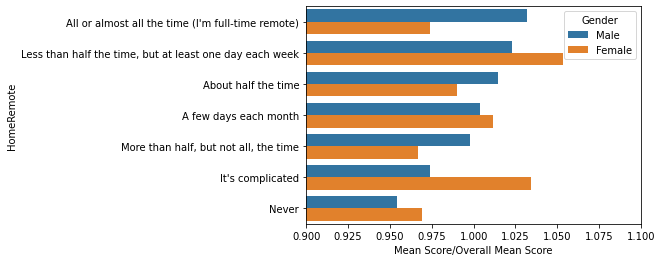

In [35]:
# Create plot order list
plot_order=["All or almost all the time (I'm full-time remote)"
           ,"More than half, but not all, the time"
           ,"About half the time"
           ,"Less than half the time, but at least one day each week"
           ,"A few days each month"
           ,"It's complicated"
           ,"Never"]
# Plot career_satisfaction by gender
ax = sb.barplot(y="HomeRemote", x="mean_ratio", hue="Gender", data=Career_Satisfaction)
# Set x limit
ax.set_xlim(.9,1.1)
# Set X label
plt.xlabel("Mean Score/Overall Mean Score")

#### Differences between Male and Female are interesting
* All or almost all the time (I'm full-time remote) showed higest career satisfaction among males.
* All or almost all the time (I'm full-time remote) was on the bottom half of career satisfaction among females
* Graph is not as compelling as the tables

#### What are the most important benefits and do they vary by gender?

In [36]:
# view top 3 benefits selected by men
male_imp_df.Benefits.str.lstrip().value_counts().head(3)

Vacation/days off    13495
Remote options       12688
Health benefits      10885
Name: Benefits, dtype: int64

In [37]:
#view top 3 benefits selected by women
female_imp_df.Benefits.str.lstrip().value_counts().head(3)

Vacation/days off    1330
Remote options       1121
Health benefits      1098
Name: Benefits, dtype: int64

* No difference between which benefits important to men compared to what is important to women.

### Conclusion
* Job Security is a little more important to females than men, but the difference is not very large.
* Javascript is most commonly used among professional and non-professional developers.  SQL is number two among professional developers, but number four for non-professional developers.
* All or almost all the time (I'm full-time remote) showed higest career satisfaction among males.
* All or almost all the time (I'm full-time remote) was on the bottom half of career satisfaction among females
* No difference between which benefits important to men compared to what is important to women.                              